# ResNet, DenseNet, and EfficientNet

## ResNet: Residual Networks
ResNet (Residual Networks) was introduced in 2015 by Kaiming He et al. in the groundbreaking paper *Deep Residual Learning for Image Recognition.* ResNet addresses the problem of vanishing gradients, which hampers the training of very deep neural networks. This issue arises because the gradients of the loss function diminish as they are propagated backward through the network, especially in deep architectures.

ResNet introduces the concept of **residual connections**, which allow the gradient to bypass one or more layers during backpropagation. Instead of learning a direct mapping $H(x)$, ResNet learns a residual mapping $F(x) = H(x) - x$. This simplifies optimization and allows models to scale to hundreds or even thousands of layers without suffering performance degradation. ResNet has several variants, such as ResNet-18, ResNet-34, ResNet-50, and ResNet-101, where the numbers indicate the depth of the network.

ResNet is widely used for tasks requiring deep architectures, such as image classification, object detection, and semantic segmentation, due to its robustness and ease of training.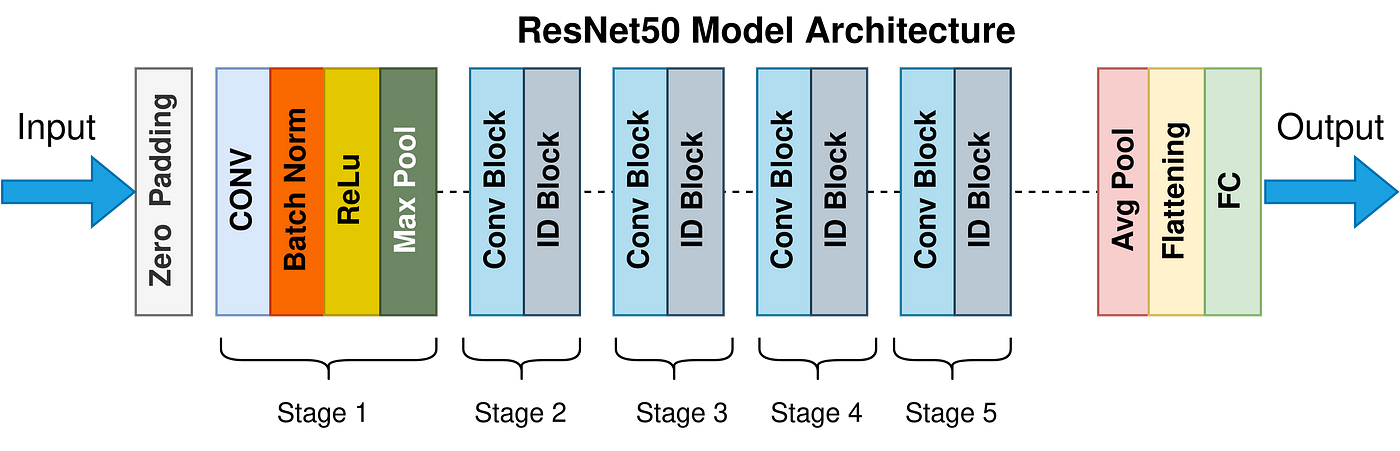

Source: https://towardsdatascience.com/the-annotated-resnet-50-a6c536034758

---

## DenseNet: Densely Connected Networks
DenseNet (Densely Connected Convolutional Networks) was introduced in 2017 by Gao Huang et al. in the paper *Densely Connected Convolutional Networks.* DenseNet takes the idea of skip connections a step further by densely connecting each layer to every other layer in a feedforward manner. In this architecture, the feature maps of all preceding layers are concatenated and used as inputs for subsequent layers.

The dense connections in DenseNet promote feature reuse, reduce the number of parameters compared to ResNet, and mitigate the vanishing gradient problem. This makes DenseNet more parameter-efficient and capable of achieving similar or better performance with fewer parameters. DenseNet is especially effective in applications where memory and computational efficiency are critical.

DenseNet variants include DenseNet-121, DenseNet-169, DenseNet-201, and DenseNet-264, which differ in their depths.

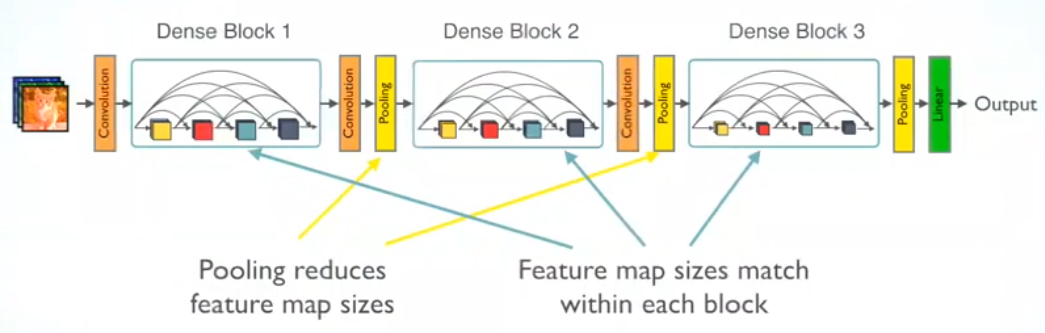

Source: https://www.digitalocean.com/community/tutorials/popular-deep-learning-architectures-densenet-mnasnet-shufflenet

---

## EfficientNet: Efficient Scaling of Networks
EfficientNet was introduced in 2019 by Mingxing Tan and Quoc V. Le in the paper *EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks.* EfficientNet addresses the challenge of scaling networks for better performance by proposing a **compound scaling method**. This method balances three critical factors: depth (number of layers), width (number of channels), and resolution (input image size).

The authors introduced a baseline network, EfficientNet-B0, optimized for accuracy and efficiency. From there, they applied compound scaling to create a family of models (EfficientNet-B1 to EfficientNet-B7) that outperform existing architectures, such as ResNet and DenseNet, on standard benchmarks while using significantly fewer parameters and FLOPs.

EfficientNet is particularly suitable for resource-constrained environments, such as mobile and edge devices, where efficiency and accuracy are equally important.

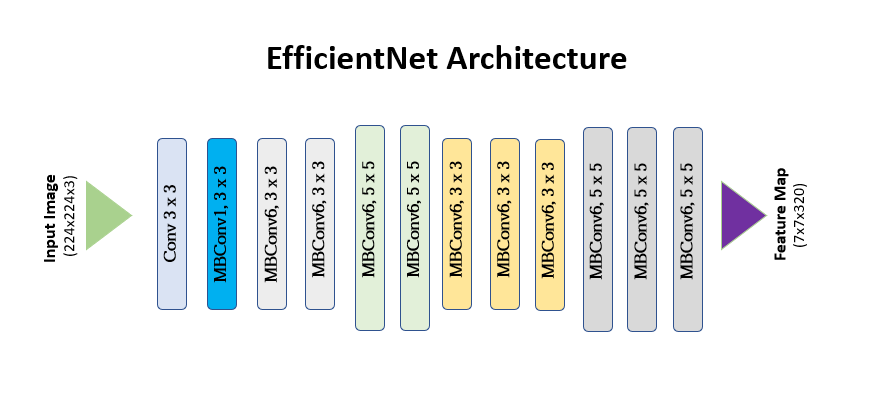

Source: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwisdomml.in%2Fefficientnet-and-its-performance-comparison-with-other-transfer-learning-networks%2F&psig=AOvVaw2PnVY3ORP-bdSBMdfgk7ig&ust=1734815615084000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCNjT6_aht4oDFQAAAAAdAAAAABAY

---

## Key Differences and Use Cases

### 1. **Architectural Design**:
- **ResNet**: Employs skip connections to learn residual mappings, facilitating training of deep networks.
- **DenseNet**: Introduces dense connectivity to promote feature reuse and parameter efficiency.
- **EfficientNet**: Optimizes network scaling using a compound scaling strategy.

### 2. **Efficiency and Parameter Usage**:
- **ResNet**: Parameter-heavy but versatile, handling very deep networks effectively.
- **DenseNet**: Achieves high performance with fewer parameters through dense connectivity.
- **EfficientNet**: Maximizes efficiency by optimizing depth, width, and resolution, making it ideal for low-resource scenarios.

### 3. **Performance**:
- **ResNet**: A solid choice for general-purpose tasks and very deep architectures.
- **DenseNet**: Excels in tasks where computational efficiency and feature reuse are critical.
- **EfficientNet**: Often delivers the best accuracy-efficiency tradeoff, making it suitable for production environments.

### 4. **Development Timeline**:
- **ResNet**: Developed in 2015, pioneering the use of skip connections.
- **DenseNet**: Developed in 2017, introducing dense connectivity for improved efficiency.
- **EfficientNet**: Developed in 2019, redefining scaling in CNNs with compound scaling.

---

Each architecture is a milestone in the evolution of deep learning, catering to specific needs and use cases. By understanding their strengths and differences, practitioners can select the most appropriate model for their applications.


### Introduction to Advanced CNN Architectures
In this notebook, we will compare three advanced convolutional neural network (CNN) architectures: **ResNet**, **DenseNet**, and **EfficientNet**. These architectures have been designed to address challenges such as vanishing gradients, parameter efficiency, and scaling.

#### Objectives:
1. Understand the core differences between ResNet, DenseNet, and EfficientNet.
2. Implement these architectures using PyTorch.
3. Train and evaluate the models on the CIFAR-10 dataset.
4. Analyze performance metrics and discuss practical use cases.

#### Key Concepts:
- **ResNet**: Introduces residual connections to ease training of deep networks.
- **DenseNet**: Utilizes dense connections to improve parameter efficiency and feature reuse.
- **EfficientNet**: Balances network depth, width, and resolution using a compound scaling method.

---
### Required Libraries
Let's start by importing the necessary libraries.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

### Exercises


3. Implement a learning rate scheduler in the training loop. Experiment with different scheduling strategies (e.g., step decay, cosine annealing).
   **Hint:** Check out `torch.optim.lr_scheduler.StepLR` and `torch.optim.lr_scheduler.CosineAnnealingLR`.

4. Replace the final fully connected layer in EfficientNet with a convolutional layer followed by global average pooling. Train and evaluate the modified model.
   **Hint:** Use a `torch.nn.Conv2d` layer followed by `torch.nn.AdaptiveAvgPool2d(1)` for global average pooling.

### Preparing the CIFAR-10 Dataset
The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 50,000 for training and 10,000 for testing. We'll normalize the images and use data augmentation to improve generalization.

#### Steps:
1. Download the CIFAR-10 dataset.
2. Apply data transformations (e.g., normalization, random flipping).
3. Create DataLoader objects for training and testing.

### Data Augmentation

1. Modify the data augmentation pipeline to include random rotations and brightness adjustments. Observe how it impacts model performance.
   **Hint:** Look into `transforms.RandomRotation` and `transforms.ColorJitter` in PyTorch's `torchvision.transforms` module.

In [ ]:
# Data transformations
# ref: https://pytorch.org/vision/0.11/auto_examples/plot_transforms.html
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(degrees=(0, 30)),     #small changes for small data sets (file sizes)
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load datasets
train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform_train)
test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform_test)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)



Files already downloaded and verified
Files already downloaded and verified


### Visualizing CIFAR-10 Images
Let's take a quick look at some images from the CIFAR-10 dataset along with their labels to understand the data.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.71453285..1.7988244].


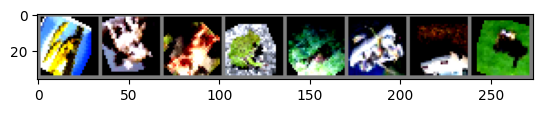

Labels: ['airplane', 'dog', 'dog', 'frog', 'deer', 'ship', 'automobile', 'dog']


In [12]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images

imshow(make_grid(images[:8]))
print("Labels:", [train_dataset.classes[label] for label in labels[:8]])


### Defining ResNet, DenseNet, and EfficientNet Models
We will use PyTorch's `torchvision.models` to load pre-trained versions of these architectures and adapt them for the CIFAR-10 dataset.

#### Why Pre-trained Models?
- Faster convergence during training.
- Transfer learning helps leverage features learned on larger datasets like ImageNet.

In [4]:
# Load pre-trained models
resnet = models.resnet18(pretrained=True)
densenet = models.densenet121(pretrained=True)
efficientnet = models.efficientnet_b0(pretrained=True)

# Modify the final layer for CIFAR-10
num_classes = 10

resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)
densenet.classifier = nn.Linear(densenet.classifier.in_features, num_classes)
efficientnet.classifier[1] = nn.Linear(efficientnet.classifier[1].in_features, num_classes)

# Send models to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet, densenet, efficientnet = resnet.to(device), densenet.to(device), efficientnet.to(device)



/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the mo

### Training Function
The training loop will:
1. Iterate through the dataset in batches.
2. Perform forward and backward passes.
3. Update model weights using an optimizer.

In [5]:
def train_model(model, dataloader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for inputs, labels in tqdm(dataloader):
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(dataloader):.4f}")



### Evaluation Function
The evaluation loop calculates accuracy on the test set.

In [6]:
def evaluate_model(model, dataloader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Accuracy: {100 * correct / total:.2f}%")



### Training and Evaluating ResNet, DenseNet, and EfficientNet
We will train each model for 2 epochs and evaluate their performance on the test set.

In [ ]:
#training settngs
criterion = nn.CrossEntropyLoss()

small_train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False, num_workers=2, sampler=torch.utils.data.SubsetRandomSampler(range(5000)))
epochs = 2


In [7]:
#Training models
optimizer_resnet = optim.Adam(resnet.parameters(), lr=0.001)
print("Training ResNet...")
train_model(resnet, small_train_loader, criterion, optimizer_resnet, epochs=epochs)
evaluate_model(resnet, test_loader)

optimizer_densenet = optim.Adam(densenet.parameters(), lr=0.001)
print("Training DenseNet...")
train_model(densenet, small_train_loader, criterion, optimizer_densenet, epochs=epochs)
evaluate_model(densenet, test_loader)

optimizer_efficientnet = optim.Adam(efficientnet.parameters(), lr=0.001)
print("Training EfficientNet...")
train_model(efficientnet, small_train_loader, criterion, optimizer_efficientnet, epochs=epochs)
evaluate_model(efficientnet, test_loader)


Training ResNet...


100%|██████████| 79/79 [01:05<00:00,  1.21it/s]


Epoch 1, Loss: 1.6932


100%|██████████| 79/79 [01:06<00:00,  1.19it/s]

Epoch 2, Loss: 1.3257


Accuracy: 62.78%
Training DenseNet...


100%|██████████| 79/79 [00:52<00:00,  1.50it/s]


Epoch 1, Loss: 1.6255


100%|██████████| 79/79 [00:52<00:00,  1.50it/s]

Epoch 2, Loss: 1.1737


Accuracy: 58.68%
Training EfficientNet...


100%|██████████| 79/79 [02:49<00:00,  2.14s/it]


Epoch 1, Loss: 1.8471


100%|██████████| 79/79 [02:55<00:00,  2.22s/it]

Epoch 2, Loss: 1.4211


Accuracy: 56.87%


### Exercises
1. Modify the data augmentation pipeline to include random rotations and brightness adjustments. Observe how it impacts model performance.
   **Hint:** Look into `transforms.RandomRotation` and `transforms.ColorJitter` in PyTorch's `torchvision.transforms` module.

2. Fine-tune the models by unfreezing all layers and re-training. Compare the results with the original training.
   **Hint:** Set `requires_grad=True` for all parameters in the model and reinitialize the optimizer.

3. Implement a learning rate scheduler in the training loop. Experiment with different scheduling strategies (e.g., step decay, cosine annealing).
   **Hint:** Check out `torch.optim.lr_scheduler.StepLR` and `torch.optim.lr_scheduler.CosineAnnealingLR`.

4. Replace the final fully connected layer in EfficientNet with a convolutional layer followed by global average pooling. Train and evaluate the modified model.
   **Hint:** Use a `torch.nn.Conv2d` layer followed by `torch.nn.AdaptiveAvgPool2d(1)` for global average pooling.

### Fine-tunning with unfreezing


2. Fine-tune the models by unfreezing all layers and re-training. Compare the results with the original training.
   **Hint:** Set `requires_grad=True` for all parameters in the model and reinitialize the optimizer.


Added the loop to set requires_grad=True for all parameters before initializing the optimizer. 
This ensures that:
- All layers in each model will be trainable
- The optimizer will update all parameters during training
- Gradients will be computed for all layers during backpropagation

Note that when fine-tuning pre-trained models with all layers unfrozen, you might want to:
- Consider using a lower learning rate (e.g., 0.0001) to prevent disturbing the pre-trained weights too much.
- Monitor for overfitting since the model has more trainable parameters.
- Potentially use a learning rate scheduler to gradually adjust the learning rate during training.

In [8]:

# Unfreeze and train ResNet
for param in resnet.parameters():
    param.requires_grad = True
    
# Unfreeze and train DenseNet
for param in densenet.parameters():
    param.requires_grad = True
    
# Unfreeze and train EfficientNet
for param in efficientnet.parameters():
    param.requires_grad = True

optimizer_resnet = optim.Adam(resnet.parameters(), lr=0.001)
print("Training ResNet with all layers unfrozen...")
train_model(resnet, small_train_loader, criterion, optimizer_resnet, epochs=epochs)
evaluate_model(resnet, test_loader)

optimizer_densenet = optim.Adam(densenet.parameters(), lr=0.001)
print("Training DenseNet with all layers unfrozen...")
train_model(densenet, small_train_loader, criterion, optimizer_densenet, epochs=epochs)
evaluate_model(densenet, test_loader)

optimizer_efficientnet = optim.Adam(efficientnet.parameters(), lr=0.001)
print("Training EfficientNet with all layers unfrozen...")
train_model(efficientnet, small_train_loader, criterion, optimizer_efficientnet, epochs=epochs)
evaluate_model(efficientnet, test_loader)


Training ResNet with all layers unfrozen...


100%|██████████| 79/79 [01:03<00:00,  1.25it/s]


Epoch 1, Loss: 1.2484


100%|██████████| 79/79 [01:09<00:00,  1.14it/s]

Epoch 2, Loss: 1.0720


Accuracy: 60.70%
Training DenseNet with all layers unfrozen...


100%|██████████| 79/79 [01:17<00:00,  1.02it/s]


Epoch 1, Loss: 1.1088


100%|██████████| 79/79 [00:54<00:00,  1.44it/s]

Epoch 2, Loss: 0.8821


Accuracy: 66.25%
Training EfficientNet with all layers unfrozen...


100%|██████████| 79/79 [03:06<00:00,  2.37s/it]


Epoch 1, Loss: 1.2698


100%|██████████| 79/79 [03:19<00:00,  2.53s/it]

Epoch 2, Loss: 1.0612


Accuracy: 63.14%


### Scheduler
Implement a learning rate scheduler in the training loop. Experiment with different scheduling strategies (e.g., step decay, cosine annealing).
   **Hint:** Check out `torch.optim.lr_scheduler.StepLR` and `torch.optim.lr_scheduler.CosineAnnealingLR`.

In [13]:
from torch.optim.lr_scheduler import StepLR, CosineAnnealingLR

In [14]:
# Unfreeze and train ResNet with StepLR scheduler
for param in resnet.parameters():
    param.requires_grad = True
# Unfreeze and train DenseNet with CosineAnnealingLR scheduler
for param in densenet.parameters():
    param.requires_grad = True
# Unfreeze and train EfficientNet with combined scheduler (StepLR + warmup)
for param in efficientnet.parameters():
    param.requires_grad = True

optimizer_resnet = optim.Adam(resnet.parameters(), lr=0.001)
scheduler_resnet = StepLR(optimizer_resnet, step_size=5, gamma=0.1)  # Reduce LR by 90% every 5 epochs
print("Training ResNet with StepLR scheduler...")

for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}, Learning Rate: {scheduler_resnet.get_last_lr()[0]:.6f}")
    train_model(resnet, small_train_loader, criterion, optimizer_resnet, epochs=1)
    scheduler_resnet.step()
evaluate_model(resnet, test_loader)


optimizer_densenet = optim.Adam(densenet.parameters(), lr=0.001)
scheduler_densenet = CosineAnnealingLR(optimizer_densenet, T_max=epochs, eta_min=1e-6)
print("\nTraining DenseNet with CosineAnnealingLR scheduler...")
for epoch in range(epochs):
    print(f"\nEpoch {epoch+1}/{epochs}, Learning Rate: {scheduler_densenet.get_last_lr()[0]:.6f}")
    train_model(densenet, small_train_loader, criterion, optimizer_densenet, epochs=1)
    scheduler_densenet.step()
evaluate_model(densenet, test_loader)


optimizer_efficientnet = optim.Adam(efficientnet.parameters(), lr=0.0001)  # Start with lower LR
warmup_epochs = 5
scheduler_efficientnet = StepLR(optimizer_efficientnet, step_size=10, gamma=0.1)
print("\nTraining EfficientNet with warmup + StepLR scheduler...")
for epoch in range(epochs):
    # Warmup phase: linearly increase LR
    if epoch < warmup_epochs:
        lr = 0.0001 + (0.001 - 0.0001) * (epoch / warmup_epochs)
        for param_group in optimizer_efficientnet.param_groups:
            param_group['lr'] = lr
    current_lr = optimizer_efficientnet.param_groups[0]['lr']
    print(f"\nEpoch {epoch+1}/{epochs}, Learning Rate: {current_lr:.6f}")
    train_model(efficientnet, small_train_loader, criterion, optimizer_efficientnet, epochs=1)
    if epoch >= warmup_epochs:
        scheduler_efficientnet.step()
evaluate_model(efficientnet, test_loader)

Training ResNet with StepLR scheduler...

Epoch 1/2, Learning Rate: 0.001000


100%|██████████| 79/79 [01:08<00:00,  1.15it/s]


Epoch 1, Loss: 1.0372

Epoch 2/2, Learning Rate: 0.001000


100%|██████████| 79/79 [01:07<00:00,  1.17it/s]

Epoch 1, Loss: 1.0071


Accuracy: 64.61%

Training DenseNet with CosineAnnealingLR scheduler...

Epoch 1/2, Learning Rate: 0.001000


100%|██████████| 79/79 [00:54<00:00,  1.45it/s]


Epoch 1, Loss: 0.9270

Epoch 2/2, Learning Rate: 0.000501


100%|██████████| 79/79 [00:54<00:00,  1.45it/s]

Epoch 1, Loss: 0.6519


Accuracy: 73.11%

Training EfficientNet with warmup + StepLR scheduler...

Epoch 1/2, Learning Rate: 0.000100


100%|██████████| 79/79 [02:54<00:00,  2.20s/it]


Epoch 1, Loss: 0.8574

Epoch 2/2, Learning Rate: 0.000280


100%|██████████| 79/79 [02:58<00:00,  2.26s/it]

Epoch 1, Loss: 0.7890


Accuracy: 69.36%


### Modified EfficientNet

Replace the final fully connected layer in EfficientNet with a convolutional layer followed by global average pooling. Train and evaluate the modified model.
   **Hint:** Use a `torch.nn.Conv2d` layer followed by `torch.nn.AdaptiveAvgPool2d(1)` for global average pooling.

In [ ]:
efficientnet.classifier = nn.Sequential(
    nn.Conv2d(efficientnet.features[-1].num_features, 10, kernel_size=1),  # Convolutional layer
    nn.AdaptiveAvgPool2d(1),  # Global Average Pooling
    nn.Flatten()  # Flatten to fit the output shape for classification
)


# Reinitialize
optimizer_efficientnet_modified = optim.Adam(efficientnet.parameters(), lr=0.001)
train_model(efficientnet, train_loader, criterion, optimizer_efficientnet_modified, epochs=2)
evaluate_model(efficientnet, test_loader)

TypeError: unsupported operand type(s) for %: 'Conv2dNormActivation' and 'int'